In [ ]:
!pip install seaborn==0.90
import seaborn as sns
!pip show seaborn

# Importando e traduzindo os dados (aula 01)

In [ ]:
import pandas as pd

dados = pd.read_csv('tips.csv')
dados.head(4)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2


In [ ]:
#Renomeando e traduzindo 

renomear = {'total_bill':'valor_da_conta',
            'tip':'gorjeta',
            'dessert':'sobremesa',
            'day':'dia_da_semana',
            'time':'hora_do_dia',
            'size':'total_de_pessoas'}
dados=dados.rename(columns = renomear) #renomeando as colunas

s_n = {'No': 'Nao',
       'Yes' : 'Sim'}
dados.sobremesa = dados.sobremesa.map(s_n)#renomeando os tipos

dias = {'Sun':'Domingo',
        'Sat':'Sabado',
        'Thur':'Quinta',
        'Fri': 'Sexta'}
dados['dia_da_semana'] = dados['dia_da_semana'].map(dias)#renomeando os tipos

horas = {'Dinner': 'Jantar',
         'Lunch': 'Almoço'}
dados.hora_do_dia = dados.hora_do_dia.map(horas)#renomeando os tipos

dados.head(4)          

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2


#Seaborn e scatterplot (aulta 02)

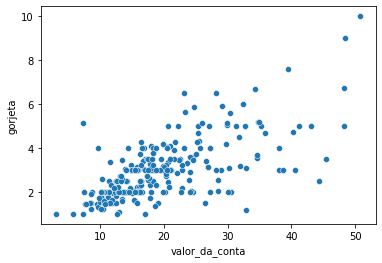

In [ ]:
#Analise valor da conta e gorjeta
sns.scatterplot(x='valor_da_conta',y='gorjeta', data = dados)

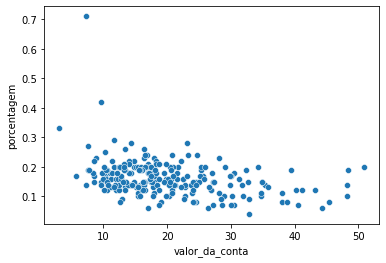

In [ ]:
#queremos verificar se a porcentagem (valor da gorjeta pelo total da conta)
dados['porcentagem']=dados['gorjeta']/dados['valor_da_conta']
dados.porcentagem=dados.porcentagem.round(2)

#verificando o grafico
porcentagem_conta=sns.scatterplot(x='valor_da_conta',y='porcentagem', data=dados)
#concluimos que a porcentagem não aumenta conforme o valor da conta, ela tem um limite ali nos 0.3

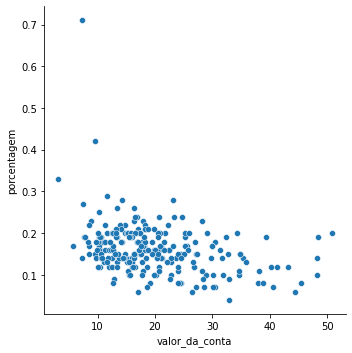

In [ ]:
porcentagem_conta=sns.relplot(x='valor_da_conta',y='porcentagem',kind='line', data=dados) #relplot de grafico de relação precisa com 'kind = line'

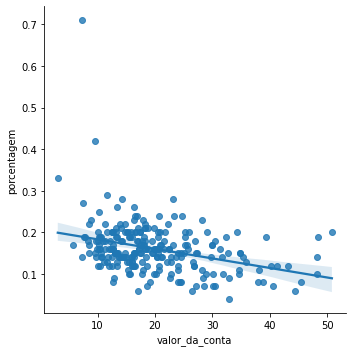

In [ ]:
porcentagem_conta=sns.lmplot(x='valor_da_conta',y='porcentagem', data=dados) #cria uma linha de regrassao

#Analisando de forma visual e descritiva (aula 03)

In [ ]:
dados[dados.sobremesa =='Sim'].describe()

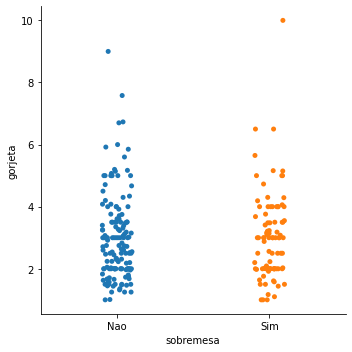

In [ ]:
sns.catplot(x='sobremesa',y='gorjeta',data = dados) #sobremesa(sim/nao) X gorjeta e já divide por categoria do sobremesa

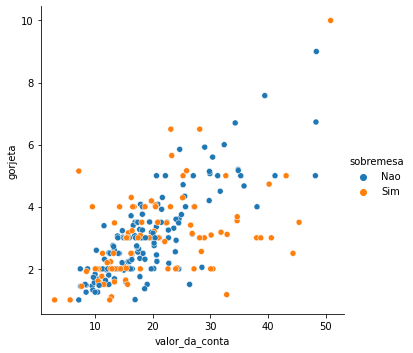

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue = 'sobremesa',data = dados)  #sobremesa(sim/nao) X gorjeta #separando pelo sim e pelo não

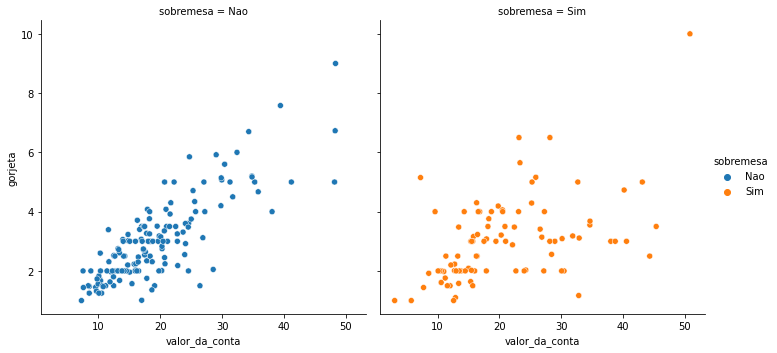

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',col = 'sobremesa',hue = 'sobremesa',data = dados) #separa os tipos da variavel sobremesa em graficos diferentes

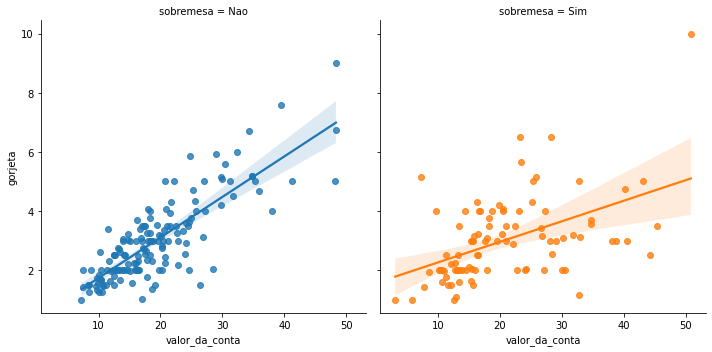

In [ ]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col = 'sobremesa',hue = 'sobremesa',data = dados) 

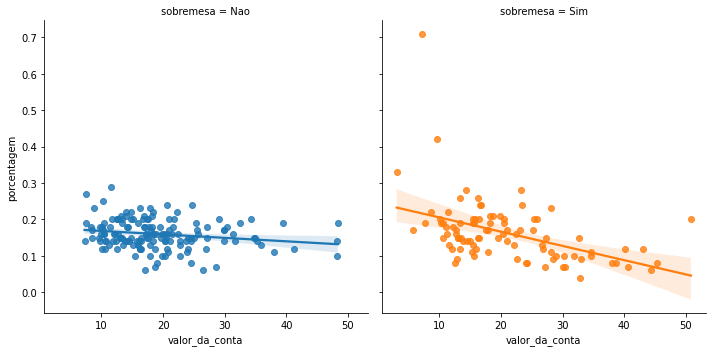

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col = 'sobremesa',hue = 'sobremesa',data = dados) 

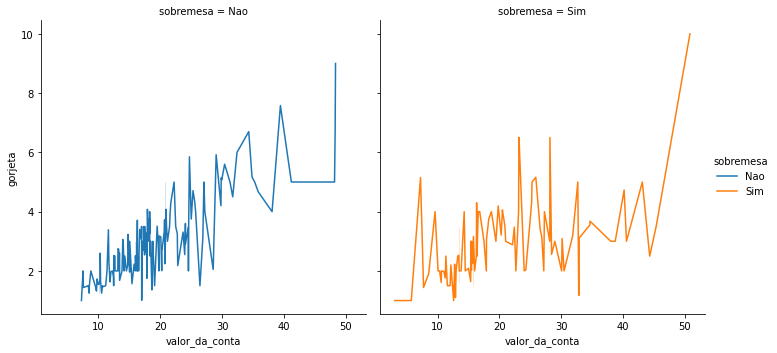

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',col = 'sobremesa',hue = 'sobremesa',kind = 'line',data = dados) 

In [ ]:
#teste de hipotese            TÁ DANDO ERRADO
from scipy.stats import ranksums # importante, teste de wilcoxon para saber se os dados vêm da mesma população

sobremesa = dados.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = dados.query("sobremesa == 'Não'").porcentagem
ranksums(sobremesa,sem_sobremesa)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

#Comparando e explorando os dias da semana (aula 04)

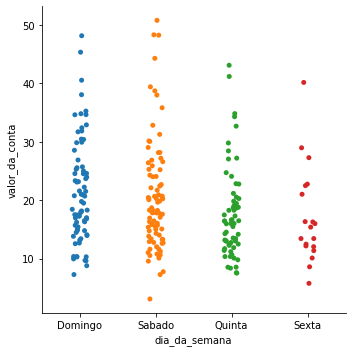

In [ ]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data = dados)

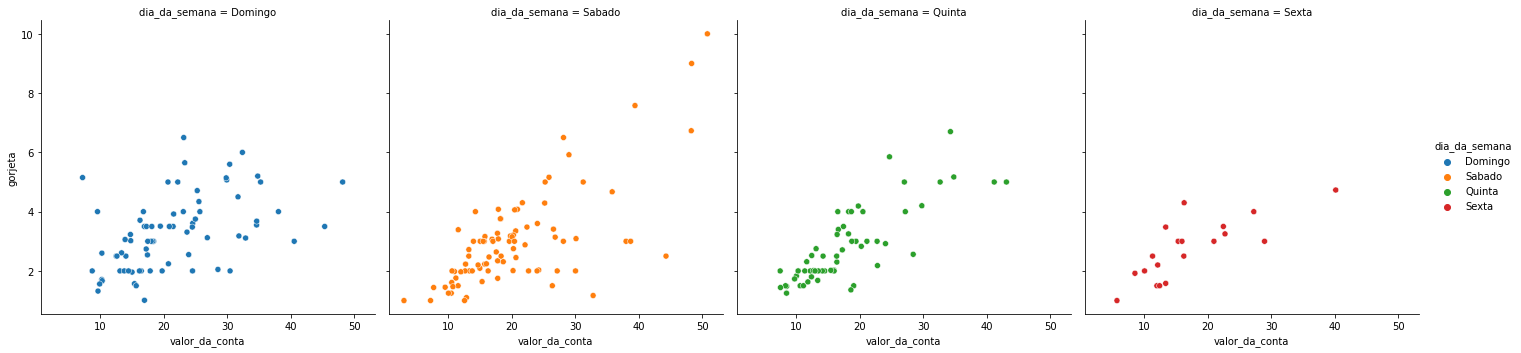

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue = 'dia_da_semana',col='dia_da_semana', data=dados)

In [ ]:
media_geral_gorjetas=dados.gorjeta.mean()
media_geral_gorjetas

In [ ]:
dados.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']] #muito útil 

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [ ]:
dados.dia_da_semana.value_counts()

Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

In [ ]:
#teste de hipotese
valor_conta_domingo = dados.query("dia_da_semana=='Domingo'").valor_da_conta

SyntaxError: ignored

# Estudo Pokemon

## imports e pretrat

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('pokemon.csv')

In [ ]:
del dados['#']

In [ ]:
dados[:3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [ ]:
dados.columns = ['nome','tipo_1','tipo_2','total','hp','atk','def','sp_atk','sp_def','spd','geracao','lendario']

In [ ]:
dados['tipo_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
renomear = {'Grass':'Planta','Fire':'Fogo','Water':'Agua','Bug':'Inseto','Poison':'Veneno',
            'Electric':'Eletrico','Ground':'Terra','Fairy':'Fada','Fighting':'Lutador',
            'Psychic':'Psiquico','Rock':'Pedra','Ghost':'Fantasma','Ice':'Gelo','Dragon':'Dragao',
            'Dark':'Sombrio','Steel':'Metal','Flying':'Voador'}
dados['tipo_1'] = dados['tipo_1'].map(renomear)

In [ ]:
dados['tipo_2'] = dados['tipo_2'].map(renomear)
dados[:3]

,nome,tipo_1,tipo_2,total,hp,atk,def,sp_atk,sp_def,spd,geracao,lendario
0,Bulbasaur,Planta,Veneno,318,45,49,49,65,65,45,1,False
1,Ivysaur,Planta,Veneno,405,60,62,63,80,80,60,1,False
2,Venusaur,Planta,Veneno,525,80,82,83,100,100,80,1,False


## Visualização

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


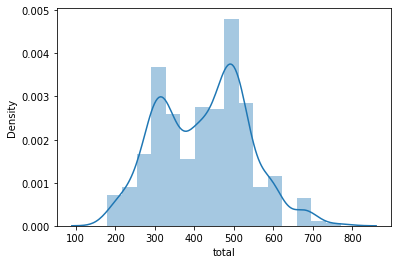

In [ ]:
sns.distplot(dados['total'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


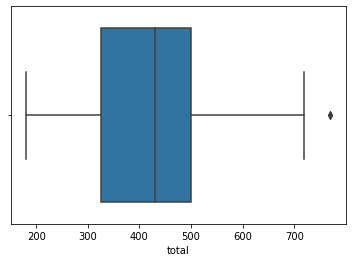

In [ ]:
sns.boxplot(dados['total'])

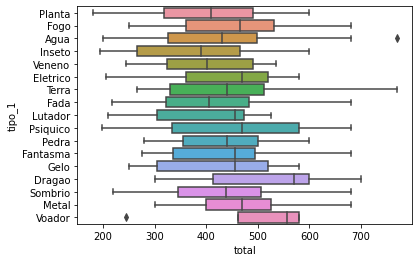

In [ ]:
sns.boxplot(x = 'total',y = 'tipo_1', data = dados)

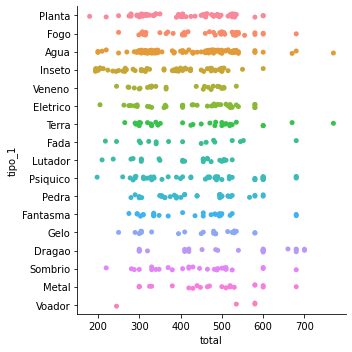

In [ ]:
sns.catplot(x = 'total',y = 'tipo_1', data = dados)